In [8]:
import numpy as np
import sys

sys.path.append("..")
from common_functions import (
    encode_message,
    decode_message,
    create_and_measure_bell_state,
    execute_and_extract_results,
)
from register_manager import RegisterManager

In [9]:
# Step 3: Entangled Particle Exchange

num_bits = 5

# Initialize registers for entangled particle exchange
registers = RegisterManager(
    num_classical=2,
    num_quantum=1,
    size_classical=num_bits,
    size_quantum=2 * num_bits,
    classical_names=["register_a", "register_b"],
    quantum_names=["quantum_register"],
)

# Assign classical and quantum registers
register_a = registers.get_classical_register("register_a")
register_b = registers.get_classical_register("register_b")
quantum_register = registers.get_quantum_register("quantum_register")

Created classical register register_a with values [0 0 1 0 0]
Created classical register register_b with values [1 1 1 0 0]
Created quantum register quantum_register with size 10


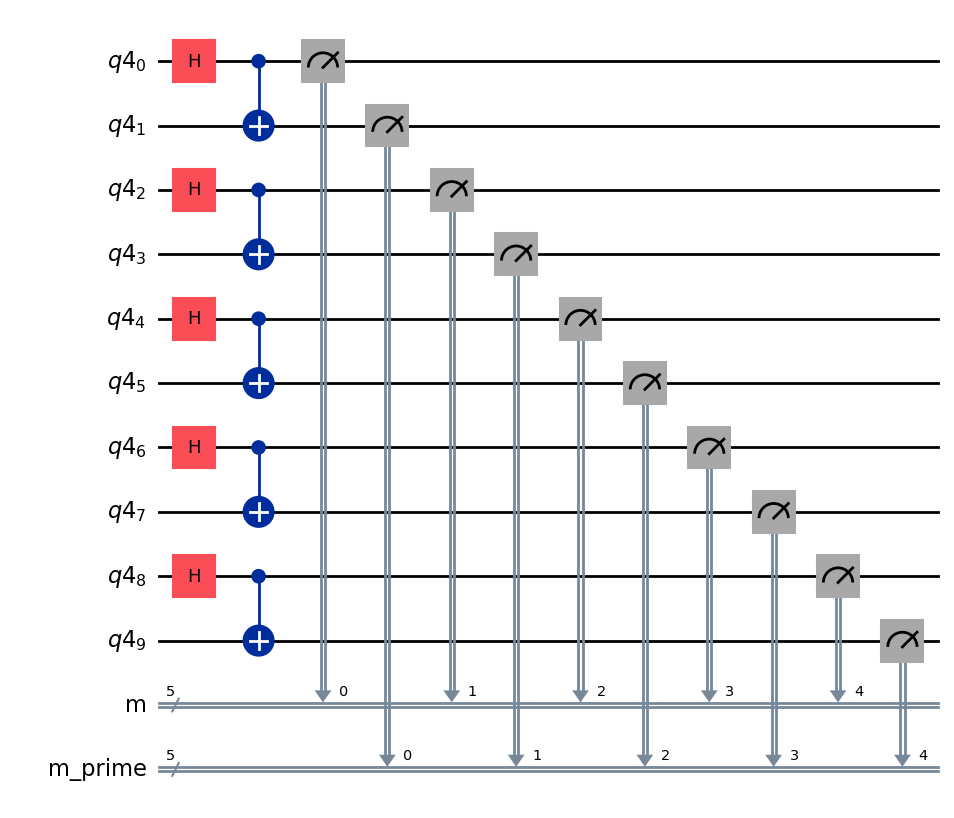

In [10]:
# Generate and measure Bell states, exchange one half with Party B
bell_state = create_and_measure_bell_state(num_bits)
bell_state.draw(output="mpl", style="iqp")

In [11]:
measurement_bits, measurement_prime_bits = execute_and_extract_results(bell_state)
print("Measurement Bits:", measurement_bits)
print("Measurement Prime Bits:", measurement_prime_bits)

Measurement Bits: [1, 0, 0, 0, 0]
Measurement Prime Bits: [1, 0, 0, 0, 0]


In [12]:
# Step 4(a): Encoding and Time-of-Flight Measurement
# Party B measures, encodes the result, and sends it to Party A
encoded_message = encode_message(measurement_prime_bits, register_b, num_bits)
# Party A receives and decodes the message, measures time of flight
# This part of the code would include stopping the clock and decoding the message

# Step 4(b): Result Verification
# Party A decodes the response and compares it with the original measurement
decoded_message = decode_message(encoded_message, register_b, num_bits)
print("\nDecoded Message:", decoded_message)

# Validate measurements - Compare original and decoded measurements
print("Measurements are equal:", np.array_equal(measurement_bits, decoded_message))


Decoded Message: [1, 0, 0, 0, 0]
Measurements are equal: True


In [13]:
# Step 5: Protocol Reversal (Optional)
# Reinitialize registers for reversed roles if repeating the protocol